In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import data_exploration as de

In [6]:
fpath = '../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv'
df = pd.read_csv(fpath)

# Distanzmatrix erstellen
X=de.distance_matrix(df)

#Diagonale enthält NAs, die für Clustering rausgelöscht werden müssen
#um zu überprüfen, ob nur die Diagonale NAs enthält, müssen genau 20 NA Werte (die Diagonale) vorliegen
if X.isna().sum().sum() == 20:

    #vielleicht sollten wir auch mit einer anderen Zahl ersetzen? Ich kann nicht einschätzen, welchen Effekt die Zahl hier auf das Clustering an sich hat...
    X=X.fillna(0)

else:
    print(f'NAs außerhalb der Diagonale!')

#Weitere Option: np.fill_diagonal(X,0) kann für Ersetzen von Diagonalen verwendet werden, muss allerdings auf ein Array angewendet werden, funktioniert nicht auf ein DataFrame.



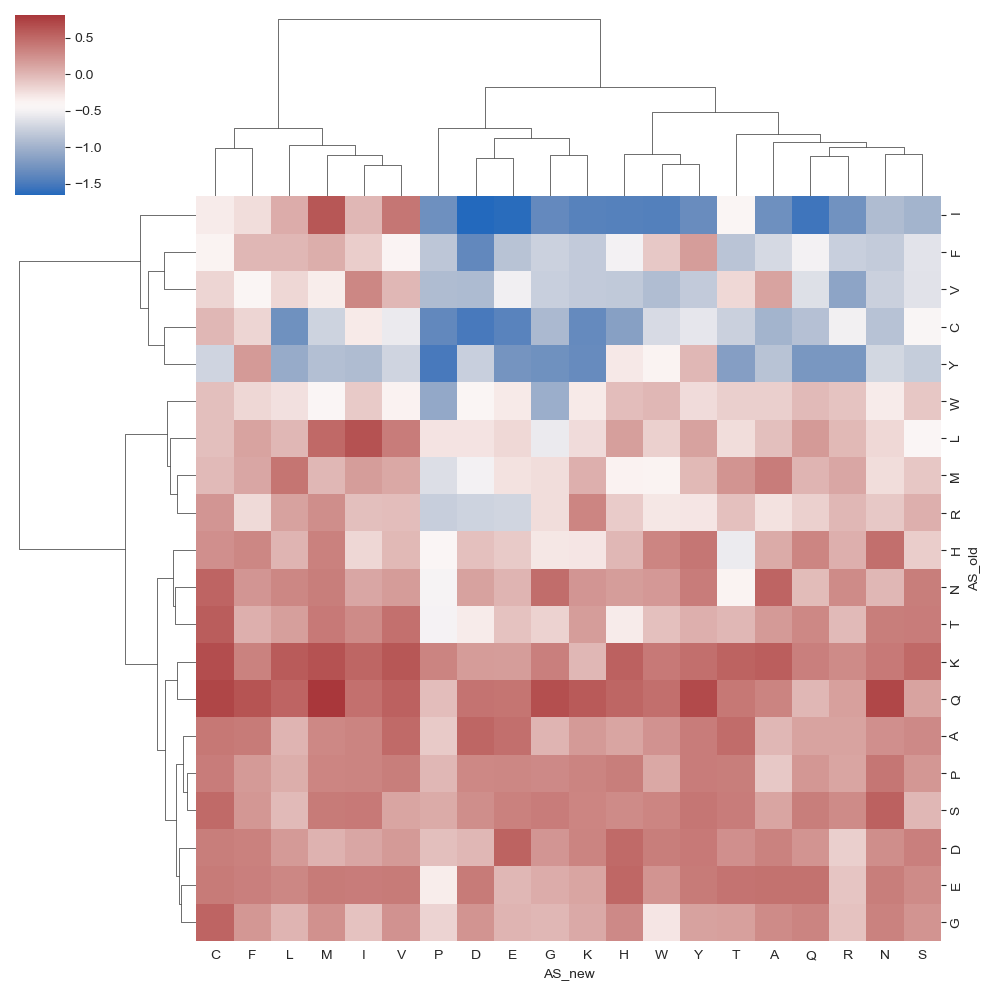

In [7]:
# Plotten der geclusterten heatmap
sns.clustermap(X, method="ward" ,cmap="vlag")
     #‘ward’ minimizes the variance of the clusters being merged.
        #‘average’ uses the average of the distances of each observation of the two sets.
        #‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
        #‘single’ uses the minimum of the distances between all observations of the two sets.

#hier passiert das Clustering in einem Befehl mit der Darstellung

In [8]:
# Entweder muss n_clusters oder distance_threshold angegeben werden. Ist irgendwie blöd, ich kann beides nicht einschätzen
clustering = AgglomerativeClustering(n_clusters=10, distance_threshold=None, linkage='ward').fit(X)
labels = clustering.labels_


#so wurde zwar das Clustering durchgeführt, aber nicht abgebildet